<font size = 6px, style="color:blue">**Drawdown in Pumping Wells**</font>

Prof. habil. Dr.-Ing. Dipl.-Math. Ekkehard Holzbecher

**Brief instruction for non-Pythonists**: The notebook is build of cells that can be read and viewed, but also edited and run. There are different types of cells (see dropdown list at the top ribbon). It is recommended not to edit if you don't know what you are doing! Only those cel
ls indicated as code have to be run (use button at top ribbon). It is convenient to run all cells at start (button: restart the kernel and re-run the whole notebook) and to toggle everything (button). To re-run a single cell use the Run button or press Shift-Return keys together.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Steady-State---Thiem-&amp;-de-Glee" data-toc-modified-id="Steady-State---Thiem-&amp;-de-Glee-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Steady State - Thiem &amp; de Glee</a></span></li><li><span><a href="#Pump-Tests-in-Confined-Aquifers---Theis" data-toc-modified-id="Pump-Tests-in-Confined-Aquifers---Theis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pump Tests in Confined Aquifers - Theis</a></span></li><li><span><a href="#Pump-Tests-in-Leaky-Aquifers----Hantush" data-toc-modified-id="Pump-Tests-in-Leaky-Aquifers----Hantush-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pump Tests in Leaky Aquifers  - Hantush</a></span></li><li><span><a href="#Partial-Penetration" data-toc-modified-id="Partial-Penetration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Partial Penetration</a></span></li><li><span><a href="#Bibliography" data-toc-modified-id="Bibliography-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bibliography</a></span></li></ul></div>

## Introduction

Pumping tests are field tests, aimed to determine the hydraulic parameters of the aquifer. In contrast to lab experiments they thus operate on a larger spatial scale. Inhomogeneities of smaller scale can thus be considered. Another advantage is that the natural conditions, consolidation, layering, etc. may be disturbed only in the close vicinity of the borehole.     

In a pumping test water is pumped from a well. As effect of the pumping in a zone around the well location the groundwater table is lowered. The resulting drawdown of the watertable is observed in at least one nearby piezometer. In the Figure below that is indicated as observation point.    

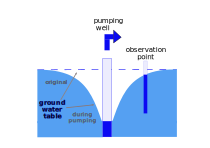

In [1]:
from IPython.core.display import SVG
SVG(filename = 'sketch.svg')

The described situation holds for an unconfined aquifer. In a confined aquifer the situation is almost the same. It is not the watertable that decreases, but the piezometric head, that is also observed in the piezometer. In the following we denote the piezometric head by $h$, which in the unconfined case is the elevation of the watertable above the aquifer base. The change of $h$ from the initial level, before the pump was started, is the drawdown, usually denoted by $s$ (Kruseman & de Ridder 1994).  

The recorded drawdown data from the test is evaluated providing values for the hydraulic properties of the aquifer. In the confined case the transmissivity $T$ is determined; in the unconfined case it is the hydraulic conductivity $K$. Usually the transient drawdown is recorded, which allows the determination of the storativity $S$ in the confined case, and the storage coefficient $S_0$ in the unconfined case. For leaky aquifers the resistance $c$ of the leaky layer is obtained in addition.   

There are special evaluation methods thet are appropriate for confined, unconfined or leaky aquifers.  
In order to apply the evaluation methods, mostly the following conditions have to be fulfilled:
* the well is ideal or fully penetrating, i.e. the well screen extends across the entire depth of the aquifer
* the well is vertical
* the well diameter is not too large
* the pumping rate is constant
* the pumping rate is not too high, in order to avoid nonlinear, non-laminar flow (deviations from Darcy"s Law)
* the aquifer has a constant thickness
* the aquifer is homogeneous
* the aquifer is isotropic
* the aquifer can be considered as infinite, i.e. boundaries with certain conditions are in far away
* well and aquifer are well connected
* the vicinity of the well is not disturbed, as effect of the drilling, for example
* the flow towards the well is mainly horizontal
* there is no significant hydraulic connection with other aquifers 
    
There are special evaluation methods that can be applied, if some of these conditions are not fulfilled.
For example, the pumping rate may be changed in steps, usually starting with a small pumping rate that is increased in steps. Also the recovery of the well, i.e. the drawdown decrease after the end of the pump operation can be utilized by modified evaluation methods.  

## Steady State - Thiem & de Glee

The figure below depicts the watertable drawdown as a 2D surface, i.e. as a cone of depression. $h$ denotes the so called piezometric head, here in relation to a reference value of zero at the undisturbed watertable. $x$ and $y$ are the scales on horizontal coordinate axes.      

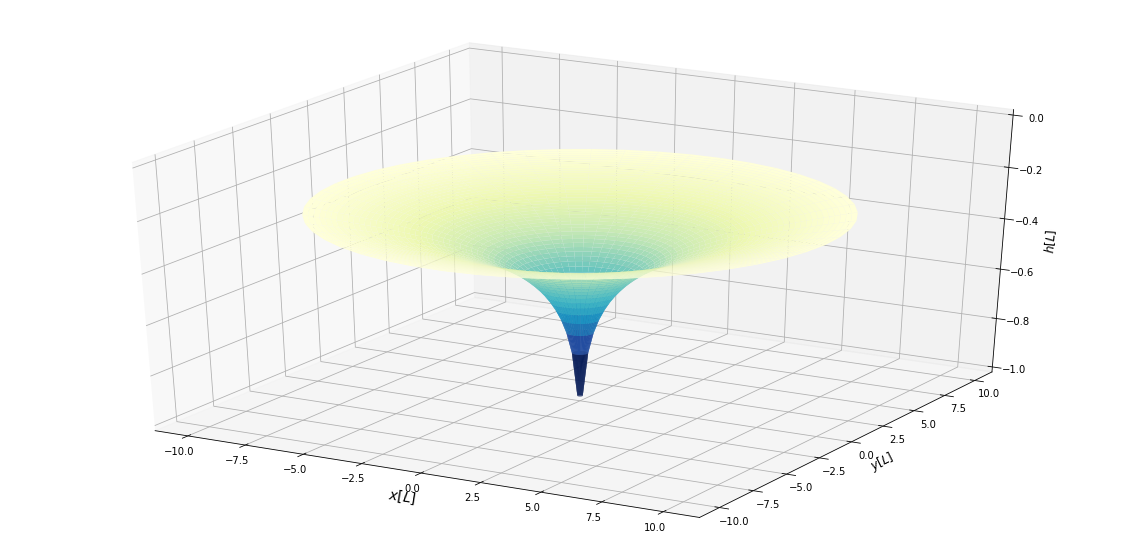

In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)                                 # omit this in the Spider program

Q = 0.001 # pumping rate [L3/T]
T = 0.001 # transmissivity [L2/T]
r0 = 0.1  # radius [L]
s0 = 1    # drawdown [L]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(r0, 10, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = -s0+Q*np.log(R/r0)/2/np.pi/T

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(-1,0)
ax.set_xlabel(r'$x[L]$', fontsize = 14)
ax.set_ylabel(r'$y[L]$', fontsize = 12)
ax.set_zlabel(r'$h[L]$', fontsize = 12)

plt.show()

The plot is printed using a mathematical formula, which would deliver the value of negative infinity in the center of the borehole. The formula for steady drawdown in a confined aquifer was already used by Thiem (1906):

$$ s(r) = s_0 - \frac Q {2 \pi T} \text{log} (r/r_0)$$

$Q$ is the pumping rate, $T$ the transmissivity of the aquifer. The physical unit of $Q$ is volume/time, for $T$ it's area/time. $r_0$ denotes a radial distance, where the drawdown $s_0$ is known. 

As only positive values for $s$ make sense, a limit radius $R$ can be calculated, for which Thiem equation holds. From the condition $s(R)=0$ one obtains a value for the outer radius $R$:  

$$ R = r_0 \text{exp} (\frac {2 \pi T}{Q} s_0)$$

Using $R$ one obtains the formula for the drawdown:

$$ s(r) = - \frac Q {2 \pi T} \text{log} (r/R)$$

**Task 2.1**: A well is pumped with a constant rate of 0.0001 m$^3$/s. In 50 m distance no drawdown is observed. Change the transmissivity [m$^2$/s] and see the effect on the drawdown as a function of radial distance.

In [32]:
import ipywidgets as widgets
wT = widgets.BoundedFloatText(value=1.e-4, min=1.e-7, max=1.0, description='$T$ [m$^2$/s]:', disabled=False)
wT

BoundedFloatText(value=0.0001, description='$T$ [m$^2$/s]:', max=1.0, min=1e-07)

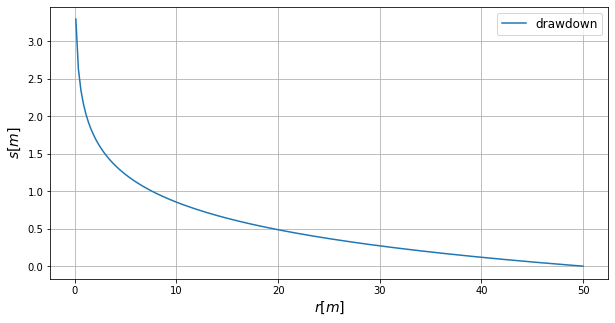

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.rcParams["figure.figsize"] = (10,5)                 

def on_wp0_clicked(self):
    Q = 0.001
    T = wT.value
    r0 = 50
    s0 = 0
    r = np.linspace (0.1,50,200)
    fig = plt.figure(); ax = plt.axes()
    ax.plot (r,s0-Q*np.log(r/r0)/2/np.pi/T,label = 'drawdown')
    ax.set_xlabel(r'$r[m]$', fontsize = 14)
    ax.set_ylabel(r'$s[m]$', fontsize = 14)
    plt.grid()
    plt.legend(loc = 'upper right',fontsize=12); 

wp0 = widgets.Button(description='Test Drawdown')        
wp0.on_click(on_wp0_clicked)   
widgets.VBox([wp0])

Let's examine the situation in which a constant drawdown of 10 m is observed in the well. The well radius is 0.1 m.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.rcParams["figure.figsize"] = (10,5)                 

def on_wp1_clicked(self):
    Q = 0.001
    T = wT.value
    r0 = 0.1
    s0 = 10
    r = np.linspace (0.1,50,200)
    fig = plt.figure(); ax = plt.axes()
    ax.plot (r,s0-Q*np.log(r/r0)/2/np.pi/T,label = 'drawdown')
    ax.set_xlabel(r'$r[m]$', fontsize = 14)
    ax.set_ylabel(r'$s[m]$', fontsize = 14)
    plt.grid()
    plt.legend(loc = 'upper right',fontsize=12); 

wp1 = widgets.Button(description='Plot Drawdown')        
wp1.on_click(on_wp1_clicked)   
widgets.VBox([wp1])

The most simple way to derive a hydraulic parameter from a pumping test requires the long-term steady state drawdown observed in the field. In addition to the above noted conditions this requires that the pump is operated long enough to reach the steady state, where drawdown is not changing anymore. Let's exercise the procedure in the following cell. 

**Task 2.2**: In an distance of 20 m a drawdown of 2 m is observed. Using the 'Plot Drawdown' graphics, can you estimate the transmissivity $T$ of the confined aquifer?    

Compare your result with the one obtained by the classical formula of Dupuit for calculating $T$:

In [48]:
def on_wp2_clicked(self):
    T = 0.001*np.log(0.1/20)/2/np.pi/(2-10)
    print ('T =',T, '[m2/s]')

wp2 = widgets.Button(description='Dupuit evaluation')        
wp2.on_click(on_wp2_clicked) 
widgets.VBox([wp2])

T = 0.00010540667486946919 [m2/s]


The formula of Dupuit is obtained by resolving the Thiem equation for $T$:

$$ T = \frac {Q}{2\pi} \frac {\text{log}(r_0/r_{well})}{s_{well}-s_0}$$

where $r_{well}$ denotes the borehole diameter, where the drawdown $s_{well}$ is measured as final drawdown and was proposed by Dupuit already in 1857. In fact this method of obtaining $T$ can be applied if the steady drawdown is known at two radial distances.   

There are many reasons why measurements in the borehole itself are **not** a good option for such evaluations. The drawdown in the borehole may be corrupted because the direct vicinity of the well does not represent aquifer conditions. The original condion of the porous medium is surely disturbed by the drilling operation itself, and also by the installation of the well with cement or grout replacing the original material in the borehole. Also some other of the conditions mentioned above may not be fullfilled. If the well is not fully penetrating, i.e. if the well screen does not extend over the entire thickness of the aquifer, close to the well there may be regions with significant vertical velocity components.     

Using the formula of Dupuit is the option without alternative, if aside from the measurement in the borehole only data from one single observation borehole is available.  

Dupuit (1857) distinguished the confined and the unconfined cases, as did Thiem. The Thiem formula for an unconfined aquifer is:

$$ h(r) = \sqrt{h_0^2 + \frac Q {\pi K} \text{log} (r/r_0)}$$

where $h$ denotes the piezometric head, i.e. the elevation of the water table above the aquifer base, and $K$ the hydaulic conductivity. For the following evaluations the head in the well is 10 m, the well radius is 0.1 m and the pumping rate 0.001 m$^3$/s. The conductivity can be altered in the input box.  

In [6]:
wK = widgets.BoundedFloatText(value=1.e-5, min=1.e-8, max=1.e-2, description='$K$ [m/s]:', disabled=False)
wK

BoundedFloatText(value=1e-05, description='$K$ [m/s]:', max=0.01, min=1e-08)

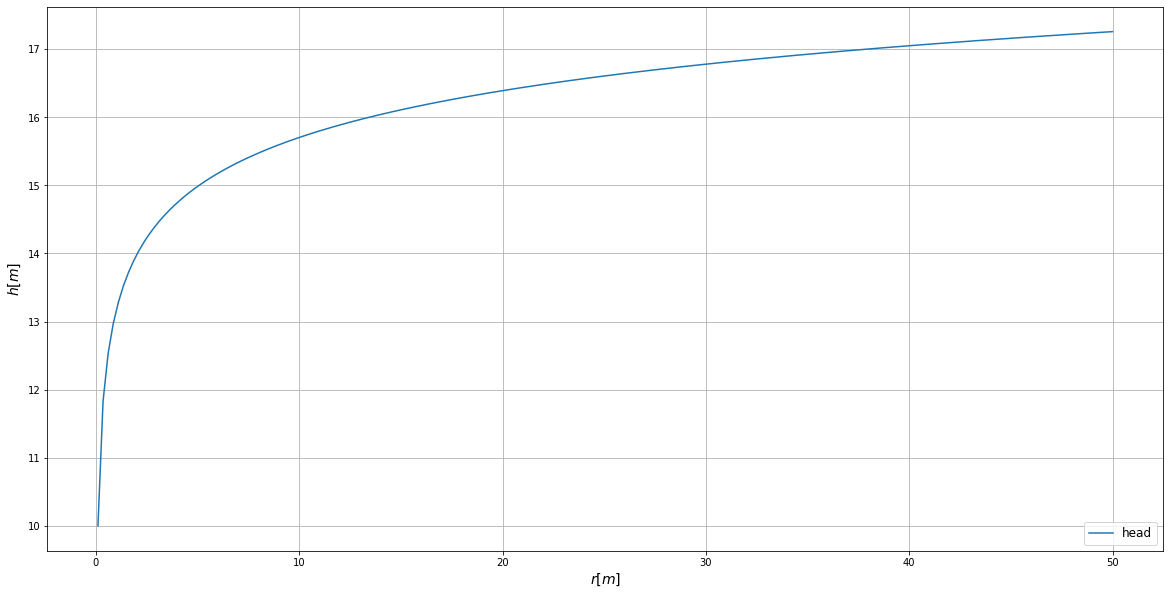

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.rcParams["figure.figsize"] = (10,5)                                 # omit this in the Spider program

def on_wp3_clicked(self):
    Q = 0.001
    K = wK.value
    r0 = 0.1
    h0 = 10.
    r = np.linspace (0.1,50,200)
    fig = plt.figure(); ax = plt.axes()
    ax.plot (r,np.sqrt(h0*h0+Q*np.log(r/r0)/np.pi/K),label = 'head')
    ax.set_xlabel(r'$r[m]$', fontsize = 14)
    ax.set_ylabel(r'$h[m]$', fontsize = 14)
    plt.grid()
    plt.legend(loc = 'lower right',fontsize=12); 

wp3 = widgets.Button(description='Plot Head')        
wp3.on_click(on_wp3_clicked)   
widgets.VBox([wp3])

**Task 2.3**: Get an estimation for the conductivity $K$, if in 20 m distance a final value of 18 m for hydraulic head was observed.

The corresponding Dupuit formula is

$$ K = \frac {Q}{\pi} \frac {\text{log}(r_0/r_{well})}{h_0^2-h_{well}^2}$$

Use the Dupuit formula to determine $K$ using the following button! Compare with your result above!

In [8]:
def on_wp3_clicked(self):
    h = 18; h0 = 10
    K = 0.001*np.log(0.1/20)/np.pi/(h0*h0-h*h)
    print ('K =',K, 'm/s')

wp3 = widgets.Button(description='Dupuit evaluation')        
wp3.on_click(on_wp3_clicked) 
widgets.VBox([wp3])

K = 7.529048204962085e-06 m/s


If the aquifer is confined by a layer with a low conductivty that allows some leakage, we call this a leaky aquifer. A leaky aquifer can be connected to another layer by a semi-permeable stratum, above or below. The semi-permeable layer can be characterised by a resistance $c$, which has the unit of time. A formula for the steady state drawdown in a leaky aquifer was developed by de Glee (1930): 

$$ s(r) = \frac Q {2 \pi T} K_0 (\frac {r}{\sqrt{Tc}})$$

$K_0$ denotes the modified Bessel function 2. type and 0. order that can be calculated easily using mathematical toolboxes on the computer. Let's see the drawdown for the given value for the pumping rate and the transmissivity entered above.  

In [61]:
import ipywidgets as widgets
wc = widgets.BoundedFloatText(value=1.e7, min=1., max=1.e10, description='$c$ [s]:', disabled=False)
wc

BoundedFloatText(value=10000000.0, description='$c$ [s]:', max=10000000000.0, min=1.0)

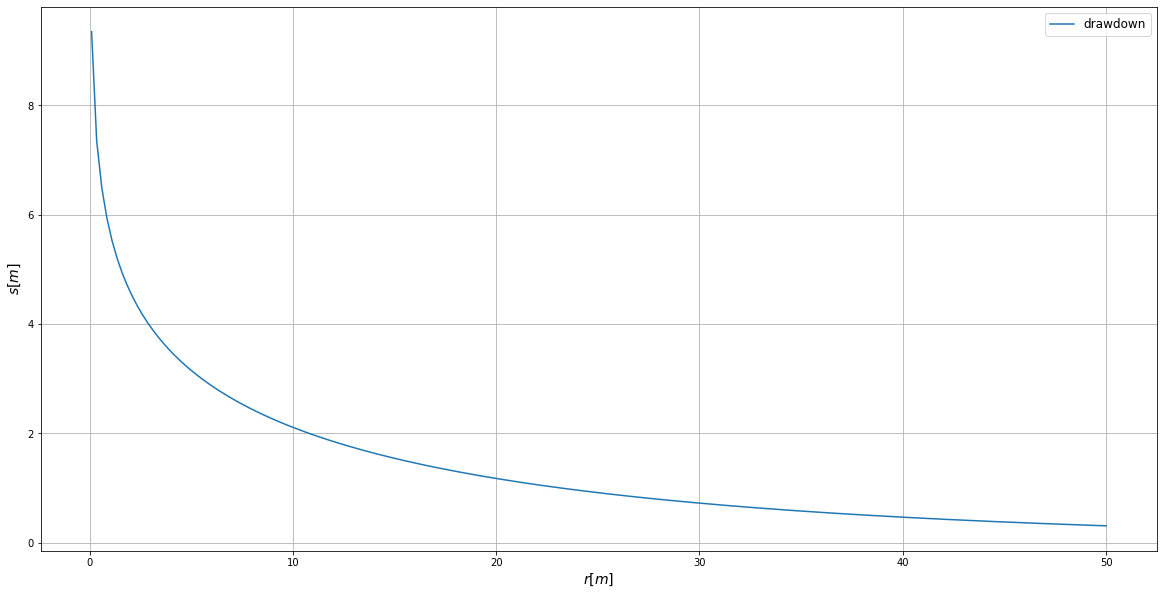

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.special import kn as besselk
plt.rcParams["figure.figsize"] = (10,5)                                 # omit this in the Spider program

def on_wp4_clicked(self):
    Q = 0.001
    T = 0.0001
    c = wc.value
    r = np.linspace (0.1,50,200)
    fig = plt.figure(); ax = plt.axes()
    ax.plot (r,Q*besselk(0,r/np.sqrt(T*c))/2/np.pi/T,label = 'drawdown')
    ax.set_xlabel(r'$r[m]$', fontsize = 14)
    ax.set_ylabel(r'$s[m]$', fontsize = 14)
    plt.grid()
    plt.legend(loc = 'upper right',fontsize=12); 

wp4 = widgets.Button(description='Plot Drawdown')        
wp4.on_click(on_wp4_clicked)   
widgets.VBox([wp4])

**Task 2.4**: In an distance of 20 m a drawdown of 2 m is observed. Can you estimate the resistance $c$ of the leaky layer? Pumping rate and transmissivity are known as $Q$=0.001 m$^3$/s and $T$=0.0001 m$^2$/s.   

## Pump Tests in Confined Aquifers - Theis

The determination of hydraulic parameters due to the steady state depends on very few observed values only. In the examples only one value was required to come up with a solution. As there is always a large uncertainty in the measurement of field data, it is more feasable if more field data can be obtained that deliver better information about the response of the aquifer due to pumping. Thus in the usual practice of pumping tests the development of the drawdown is recorded. This also has the advantage that pumping tests can be evaluated in which the steady state is not reached at the end of the test, when the pumped is switched off.

The formula for the unsteady drawdown in a confined aquifer as function of the distance $r$ and time $t$ was published by Theis (1952): 

$$ s(r, t) = \frac Q {4 \pi T} W(u),\,\,\,\, u = \frac {r^2 S} {4 T t}$$

In addition to the parameters that are introduced above, the storativity $S$ appears. $S$ is dimensionless and determines how quick the aquifer responds to the changed regime of pumping. $W$ denotes the well function, also known as exponential integral. $W$ is available in mathematical software packages, which makes the computation of the drawdown an easy thing to do. Click the following buttons to see the well function in differnent coordinate axes.   

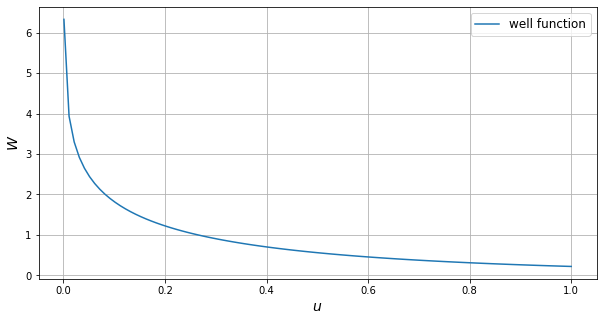

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.special import exp1
plt.rcParams["figure.figsize"] = (10,5)                                 # omit this in the Spider program

def on_wflin_clicked(self):   
    fig = plt.figure(); ax = plt.axes()
    u = np.linspace (1.e-3,1,100)    
    plt.plot (u,exp1(u),label = 'well function')
    ax.set_xlabel('$u$', fontsize = 14); ax.set_ylabel('$W$', fontsize = 14)
    plt.grid()
    plt.legend(loc = 'upper right',fontsize=12);
    
def on_wflog_clicked(self): 
    fig = plt.figure(); ax = plt.axes()
    u = np.logspace (-12,1,100)    
    plt.plot (u,exp1(u),label = 'well function')
    ax.set_xscale('log')
    ax.set_xlabel('$u$', fontsize = 14); ax.set_ylabel('$W$', fontsize = 14)
    plt.grid()
    plt.legend(loc = 'upper right',fontsize=12);

def on_wflog1_clicked(self): 
    fig = plt.figure(); ax = plt.axes()
    u = np.logspace (-12,1,100)    
    plt.plot (1/u,exp1(u),label = 'well function')
    ax.set_xscale('log')
    ax.set_xlabel('1/$u$', fontsize = 14); ax.set_ylabel('$W$', fontsize = 14)
    plt.grid()
    plt.legend(loc = 'lower right',fontsize=12);    
    
wflin = widgets.Button(description='linear u')        
wflin.on_click(on_wflin_clicked) 
wflog = widgets.Button(description='semi-log u')        
wflog.on_click(on_wflog_clicked)
wflog1 = widgets.Button(description='semi-log 1/u')        
wflog1.on_click(on_wflog1_clicked)
widgets.HBox([wflin,wflog,wflog1])

The 1/$u$ axis is often used, as it represents increasing time on the horizontal axis, as we usually look at real data. The semi-logarithmic plots show that over almost the entire range of $u$-values the well function can be approximated by a straight line. That is the clue to use graphical methods for estimation of the unknown $T$ and $S$ values, as will be outlined later.   

The Theis formula is implemented in the following as a function of it's parameters. For values of pumping rate *Q*, distance between pumping and observation well *r*, transmissivity *T* and storativity *S* the resulting drawdown *s* as is depicted as it develops in time $t$. 

In [12]:
wQ = widgets.FloatText(value=1.e-3, min = 1.e-7, max = 1., description='$Q$ [m$^3$/s]:', disabled=False)
wr = widgets.FloatText(value=10, description='$r$ [m]:', min=1.e-2, max = 1.e4, disabled=False)
widgets.HBox([wQ, wr])

In [13]:
wT2 = widgets.FloatText(value=1.e-3, min = 1.e-7, max = 1., description='$T$ [m$^2$/s]:', disabled=False)
wS = widgets.FloatText(value=1.e-2, description='$S$ [-]:', min=1.e-7, max = 1., disabled=False)
widgets.HBox([wT2, wS])

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import ipywidgets as widgets
from scipy.special import exp1
plt.rcParams["figure.figsize"] = (16,8)                                 # omit this in the Spider program

def on_wp5_clicked(self):
    Q = wQ.value
    T = wT2.value
    S = wS.value
    r = wr.value
    fig = plt.figure(); ax = plt.axes()
    if wca.value: 
        ax.set_xscale('log');
        t = np.logspace (1,6,100)
    else:
        ax.xaxis.set_major_locator(MultipleLocator(3600)) 
        t = np.linspace (10,50000,100)
    plt.plot (t,Q*exp1(r*r*S/4/T/t)/4/np.pi/T,label = 'drawdown')
    ax.set_xlabel(r'$t[s]$', fontsize = 14)
    ax.set_ylabel(r'$s[m]$', fontsize = 14)
    plt.grid()
    plt.legend(loc = 'lower right',fontsize=12);
    
wp5 = widgets.Button(description='Plot drawdown')        
wp5.on_click(on_wp5_clicked)   
wca = widgets.Checkbox(value=False, description='log', disabled=False, indent=False)
widgets.HBox([wp5,wca]) 

**Task 3.1**: Change storativity and transmissivity and observe the changes in drawdown!

**Task 3.2**: For given $Q$=0.002 m$^3$/s, $r$=20 m, and $T$=0.002 m$^2$/s after 10 hours pumping a drawdown of 0.5 m was measured. Estimate $S$!

**Task 3.3**: For given $Q$=0.01 m$^3$/s, $r$=7.5 m, and $S$=5.e-4 after 3 hours pumping a drawdown of 0.5 m was observed. Estimate $T$!

In real pumping tests the situation is more complex due to the fact that both transmissivity and storativity are unknown. There is no single curve that is the best fit of a single measurement. It is usual practice that drawdown values are recorded at fixed time instants, so that a series of values is given. See for example the data represented in the following plot:    

In [15]:
import pandas as pd
df1 = pd.DataFrame(columns=['t1','s1'])
df2 = pd.DataFrame(columns=['t2','s2'])
df3 = pd.DataFrame(columns=['t3','s3'])
df1['t1'] = [0.1,1,2,6.5,10,20,35,83,158,271,460,750,1440,2880,4320,5732]  # time in minutes!
df1['t1'] = df1['t1']*60
df1['s1'] = [2.0,3,4,5,6,7,8,9,10,11,12,13,14,14,14,14] # drawdown in centimeters
df1['s1'] = df1['s1']/100
df2['t2'] = [2.0,7,10,20,35,90,164,289,489,935,1631,4440,5730,5731]
df2['t2'] = df2['t2']*60
df2['s2'] = [2,3,4,5,6,7,8,9,10,11,12,13,13,13]
df2['s2'] = df2['s2']/100
df3['t3'] = [1,2,10,48,194,478,1218,2218,3172,5730,5731]
df3['t3'] = df3['t3']*60
df3['s3'] = [0,1,2,3,4,5,6,7,8,8,8]
df3['s3'] = df3['s3']/100
print ('Data ready')

Data ready


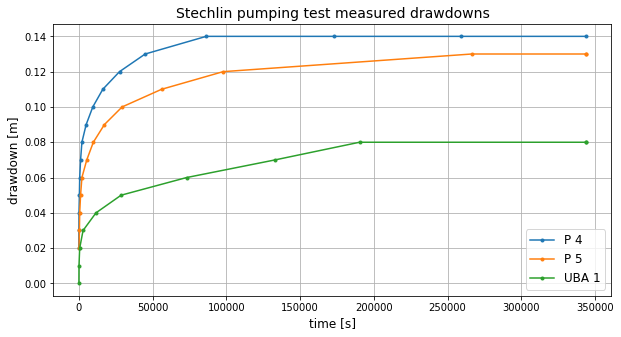

In [16]:
def on_wp0_clicked(self):
    plt.rcParams["figure.figsize"] = (10,5) 
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    plt.plot (df1['t1'],df1['s1'], '.-', label = 'P 4' )
    plt.plot (df2['t2'],df2['s2'], '.-', label = 'P 5' )
    plt.plot (df3['t3'],df3['s3'], '.-', label = 'UBA 1' )
    plt.title('Stechlin pumping test measured drawdowns',fontsize=14)
    plt.xlabel('time [s]',fontsize=12)
    plt.ylabel('drawdown [m]',fontsize=12)
    plt.grid()
    plt.legend(loc = 'lower right',fontsize=12);
    
wp0 = widgets.Button(description='Plot data')        
wp0.on_click(on_wp0_clicked)   
widgets.VBox([wp0])

A pump was operated over a time period of 5731 minutes, which amounts to almost 4 days. The pumping rate was 20 m$^3$/h = 0.0055 m$^3$/s. There were three observation wells: P4, P5 and UBA 1, located at distances of 5.3, 10.2 and 29 m from the pumping well. The maximum drawdown was 14 cm in P4, 13 cm in P5, and 8 cm in UBA 1.

In all pumping tests there is a rapid drawdown increase at first, which is eventually slowing down. for that reason the data are often displayed with a logarithmic time axis. 

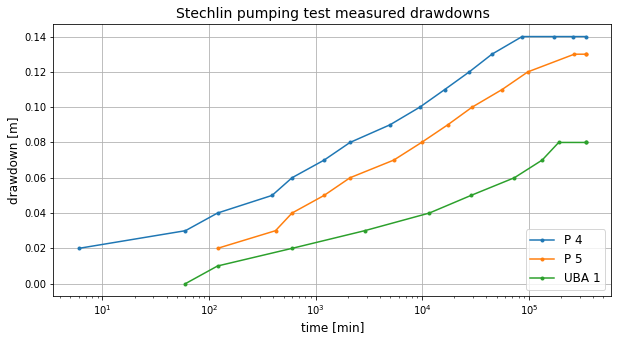

In [17]:
def on_wp2_clicked(self):
    plt.rcParams["figure.figsize"] = (10,5) 
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    ax.set_xscale('log')
    plt.plot (df1['t1'],df1['s1'], '.-', label = 'P 4' )
    plt.plot (df2['t2'],df2['s2'], '.-', label = 'P 5' )
    plt.plot (df3['t3'],df3['s3'], '.-', label = 'UBA 1' )
    plt.title('Stechlin pumping test measured drawdowns',fontsize=14)
    plt.xlabel('time [min]',fontsize=12)
    plt.ylabel('drawdown [m]',fontsize=12)
    plt.grid()
    plt.legend(loc = 'lower right',fontsize=12);

wp2 = widgets.Button(description='Plot log scale')        
wp2.on_click(on_wp2_clicked)   
widgets.VBox([wp2]) 

As the analytical solution is basically a logarithm function we expect straight lines in this representation. Deviations from the straight line indicate a different regime. In the data shown we observe a straight line for P4 and P5 at intermediate times. At beginning and end of the text there are obviously deviations, and the UBA 1 borehole in largest distance from the pumping well shows a different regime. 

In order to obtain a better comparison of different observation boreholes, it is convenient to use the $t/r^2$ scale on the time axis. For the considered drawdowns that gives the following result. 

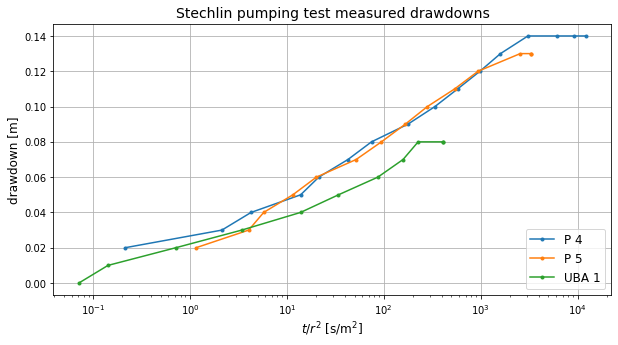

In [18]:
def on_wp4_clicked(self):
    plt.rcParams["figure.figsize"] = (10,5) 
    fig = plt.figure(facecolor='w'); ax = fig.add_subplot()
    ax.set_xscale('log')
    plt.plot (df1['t1']/5.3/5.3,df1['s1'], '.-', label = 'P 4' )
    plt.plot (df2['t2']/10.2/10.2,df2['s2'], '.-', label = 'P 5' )
    plt.plot (df3['t3']/29/29,df3['s3'], '.-', label = 'UBA 1' )
    plt.title('Stechlin pumping test measured drawdowns',fontsize=14)
    plt.xlabel('$t/r^2$ [s/m$^2$]',fontsize=12)
    plt.ylabel('drawdown [m]',fontsize=12)
    plt.grid()
    plt.legend(loc = 'lower right',fontsize=12);

wp4 = widgets.Button(description='Plot t/r/r scale')        
wp4.on_click(on_wp4_clicked)   
widgets.VBox([wp4])

The figure shows that we could use the same straight line to approximate the values of P4 and P5 in the intermediate time range. TYhis tells us that in this relevant time range the same flow characteristics are valid for P4 and P5. The differences at the start of the pumping test result from differences in the direct vicinity of the well in directions of P4 and P5. The observation piezometer UBA 1 is located further away, where inhomogeneities of the porous medium may have caused a modification of the flow regime.    

In order to find values for $T$ and $S$ that produce that drawdown data one has to shift these curves to fit with the well function type curve shown above. We will learn about several pump test evaluation methods later.  

## Pump Tests in Leaky Aquifers  - Hantush

For a leaky aquifer the drawdown is given by the Hantush well function $W$, which has two arguments:

$$ s(r, t) = \frac Q {4 \pi T} W(u,r/\lambda)$$

with $\lambda=\sqrt{T\cdot c}$ where $c$ denotes the resistance of the over-lying semipermeable layer, which is the third yet unknown parameter. The physcial unit of resistance is time. The equation was derived assuming an overall source (Hantush & Jacob 1955, Hantush 1956). Using the more realistic boundary condition at the top of the modelled cross-section Hantush (1967) showed conditions, under which the equation can be taken as a valid approximation.

In [19]:
wQ2 = widgets.FloatText(value=1.e-3, min = 1.e-7, max = 1., description='$Q$ [m$^3$/s]:', disabled=False)
wr2 = widgets.FloatText(value=10, description='$r$ [m]:', min=1.e-2, max = 1.e4, disabled=False)
widgets.HBox([wQ2, wr2])

In [60]:
wT3 = widgets.FloatText(value=1.e-3, min = 1.e-7, max = 1., description='$T$ [m$^2$/s]:', disabled=False)
wS2 = widgets.FloatText(value=1.e-2, description='$S$ [-]:', min=1.e-7, max = 1., disabled=False)
wc2 = widgets.FloatText(value=1.e5, description='$c$ [s]:', min=1, max = 1.e8, disabled=False)
widgets.HBox([wT3, wS2, wc2])

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import ipywidgets as widgets
from scipy.special import kn as BesselK
plt.rcParams["figure.figsize"] = (16,8)                                 # omit this in the Spider program

def heval (t,r,T,S,c,Q):                 # calculate Hantush solution
    T0  = np.where(T>1.e-10,T,1.e-10) 
    S0  = np.where(S>1.e-10,S,1.e-10)
    c0  = np.where(c>1.e-10,c,1.e-10)
    lamda = np.sqrt(T0*c0)                
    rho = r/lamda
    tau = np.log(2*lamda/r*t/(c0*S0))
    s = Q/(4*np.pi*T0)*func_F(rho,tau)
    return s                             # drawdown 

def ExpInt(n,u):
    # Fast approximation for Wu according to equation 7a and 7b from Srivastava(1998)
    gamma = 0.5772 # Euler-Macheroni constant
    u0  = np.where(u<1.0,u,1) 
    Wu0 = np.log(np.exp(-gamma)/u0) + 0.9653*u - 0.1690*u0**2
    u1 = np.where(u>=1.0,u,1) 
    Wu1 = 1/(u1*np.exp(u1))*(u1+0.3575)/(u1+1.280)
    Wu = np.where(u<1.0,Wu0,Wu1)
    return Wu

def func_F(rho,tau):
    e = exp1(rho)
    e0 = np.where(e>0,e,1.e-10)
    w = (e0-BesselK(0,rho))/(e0-exp1(rho/2))
    F0 = w*exp1(rho/2*np.exp(-tau))-(w-1)*exp1(rho*np.cosh(tau))  
    F1 = 2*BesselK(0,rho) - w*exp1(rho/2*np.exp(tau)) + (w-1)*exp1(rho*np.cosh(tau))   
    return (tau<=0)*F0+(tau>0)*F1 

def on_wp6_clicked(self):
    Q = wQ2.value
    T = wT3.value
    S = wS2.value
    r = wr2.value
    c = wc2.value
    fig = plt.figure(); ax = plt.axes()
    if wca2.value: 
        ax.set_xscale('log');
        t = np.logspace (1,6,100)
    else:
        ax.xaxis.set_major_locator(MultipleLocator(3600)) 
        t = np.linspace (10,50000,100)
    plt.plot (t,heval (t,r,T,S,c,Q),label = 'drawdown')
    ax.set_xlabel(r'$t[s]$', fontsize = 14)
    ax.set_ylabel(r'$s[m]$', fontsize = 14)
    plt.grid()
    plt.legend(loc = 'lower right',fontsize=12);
    
wp6 = widgets.Button(description='Plot drawdown')        
wp6.on_click(on_wp6_clicked)  
wca2 = widgets.Checkbox(value=False, description='log', disabled=False, indent=False)
widgets.HBox([wp6,wca2])

**Task 4.1**: Change resistance and observe the changes in drawdown!

**Task 4.2**: For given $Q$=0.002 m$^3$/s, $r$=20 m, $T$=0.002 m$^2$/s and S = 0.001 after 2 hours and 45 minutes pumping a drawdown of 0.35 m was measured. Estimate $c$!

Note that this is just an exercise. The task arising in practice is more intricate: (1) there is not only one drawdown value to fit, but one or more drawdoen curves, measured over a certain time period; (2) there are three unknown parameters: $T, S$ and $c$, not only one! 

## Partial Penetration

Thicker aquifers are mostly only partially penetrated by well screens, in order to save drilling and installation expences. 

With a fully penetrating well screen, the flow lines towards the well are essentially all virtually parallel and horizontal. This is also the case with partially penetrating well at distances larger than about 1.5 times the aquifer thickness. But at closer distances, the streamlines must converge towards the smaller screen. This causes vertical velocity components and larger velocities near the screen and, therefore, an extra loss of head. This head loss due to converging streamlines is the extra drawdown due to partial penetration.

If one compares the flow in the situation with a fully penetrating well screen with that of a partially penetrating screen at the same spot, one imagins that to obtain the flow in the case of the partially penetrating screen, one can take the case of the fully penetrating screen and superimpose above and below the partially penetrating screen an injection that makes the combined flow at r=0 above and below the screen equal zero. At the same time, this injection is extra extracted from the partially penetrating screen itself.

Hantush (1961a,b) derived a formula a formula for the steady state drawdown in a partially penetrating well. The geometric parameters $a, b$ and $D$ are defined in a cylindrical coordinate system with origin at the aquifer base:

* $r$ : horizontal radial coordinate
* $z$ : vertical coordinate upwards
* $a$ : distance of top of screen to bottom of aquifer
* $b$ : distance of bottom of screen to bottom of aquifer
* $d$ : thickness of the aquifer


According to Kruseman & de Ridder (1994) in a confined aquifer the effect of partial penetration is accounted for by the following formula:

$$ 𝑠(r,z,t)=𝑠_{𝑓𝑢𝑙𝑙}(r,t)+\frac{𝑄}{2𝜋T} \frac{2d}{𝜋(a-b)}\sum_{n=1}^{\infty}\frac{1}{𝑛}\biggl(\text{sin}(\frac{𝑛𝜋𝑎}{d})−\text{sin}(\frac{𝑛𝜋𝑏}{d})\biggr) \text{cos}(\frac{𝑛𝜋𝑧}{d})\text{𝐾}_0(\frac{𝑛𝜋𝑟}{d}) $$

An additional term has to be added to the total drawdown of a fully penetrating well $s_{full}$. The formula is used for steady and transient situations. Obviously in reality that additional drawdown requires some time to develop. For the early times of pumping the formula may thus not be valid.   

Let's look at the additional drawdown. First specify the input values.   

In [59]:
wQ3 = widgets.FloatText(value=0.0139, min = 1.e-7, max = 1., description='$Q$ [m$^3$/s]:', disabled=False)
wT4 = widgets.FloatText(value=0.007, min = 1.e-7, max = 1., description='$T$ [m$^2$/s]:', disabled=False)
wr3 = widgets.FloatText(value=0.3, description='$r_{well}$ [m]:', min=1.e-2, max = 1.e4, disabled=False)
widgets.HBox([wQ3, wT4, wr3])

In [58]:
wd = widgets.FloatText(value=50, min = 1, max = 1., description='$d$ [m]:', disabled=False)
wa = widgets.FloatText(value=40, min = 0, max = wd.value, description='$a$ [m]:', disabled=False)
wb = widgets.FloatText(value=30, min = 0, max = wa.value, description='$b$ [m]:', disabled=False)
widgets.HBox([wd, wa, wb])

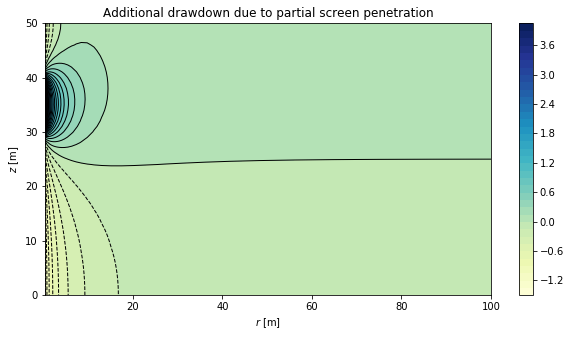

In [24]:
import matplotlib.pylab as plt
from scipy.special import k0 # bessel function K0
import numpy as np
plt.rcParams["figure.figsize"] = (10,5)                                 # omit this in the Spider program

def dWpp(r, z, a, b, d):
    tol = 1e-3
    r = np.array(r.ravel(), dtype = float)[np.newaxis,:]
    z = np.array(z.ravel(), dtype = float)[:,np.newaxis]
    alpha= np.pi * a/d
    beta = np.pi * b/d
    zeta = np.pi * z/d
    rho  = np.pi * r/d
    delta= np.pi * (a-b)/d
    maxiter = 500
    Dw = (z*r)*0.
    dw0 = np.ones(Dw.shape)
    for n in np.arange(1.,maxiter+1.):
        dw1 = dw0
        dw0 = (np.sin(n*alpha)-np.sin(n*beta))*np.cos(n*zeta)*k0(n*rho)/n
        Dw += dw0
        #print(np.sum(np.abs(dw1 + dw0)))
        if np.sum(np.abs(dw1 + dw0))< tol:
            break
    #print("Iterations: {}".format(n))
    return (2./delta) * Dw

Q = wQ3.value #1200./86400
T = wT4.value #600./86400
d = wd.value  #50.
a = wa.value  #40.
b = wb.value  #30.
r0 = wr3.value #0.3
r = np.logspace(np.log10(r0), 2., 41)
z = np.linspace(0., d, 51)
dw = Q/(2*np.pi*T)*dWpp(r, z, a, b, d)
fig = plt.figure(); ax = plt.axes()
ax.set(xlabel='$r$ [m]', ylabel='$z$ [m]', title='Additional drawdown due to partial screen penetration')
CS = plt.contourf(r,z,dw,40,cmap=plt.cm.YlGnBu)
cbar = fig.colorbar(CS)
ax.contour(r, z, dw, 40, colors = 'k', linewidths=(1,))
plt.show()

This is the head that has to be superimposed to the situation with a fully penetrating screen. The head contours show that there is not only extraction from the screen but also injection above and below the screen, which, if superimposed to the case of the fully penetrating screen should yield no flow there. 

Let's have a look at the total drawdown now, by adding to the Theis solution. Note that the storativity $S$ was not used above. Thus it has to be introduced. As the solution is time-dependent, it is also necessary to input a time.    

In [72]:
wS3 = widgets.FloatText(value=1.e-3, description='$S$ [-]:', min=1.e-7, max = 1., disabled=False)
wt = widgets.FloatText(value=86400, description='$t$ [s]:', min=1, max = 1.e6, disabled=False)
widgets.VBox([wS3, wt])

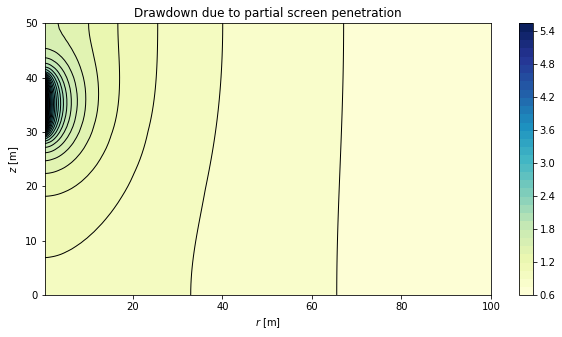

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.special import exp1
plt.rcParams["figure.figsize"] = (10,5)

Q = wQ3.value #1200./86400
T = wT4.value #600./86400
S = wS3.value #0.001
d = wd.value  #50.
a = wa.value  #40.
b = wb.value  #30.
r0 = wr3.value #0.3
t = wt.value  #86400
r = np.logspace(np.log10(r0), 2., 41)
z = np.linspace(0., d, 51)
s = Q/(4*np.pi*T)*exp1(r*r*S/4/T/t) + Q/(2*np.pi*T)*dWpp(r, z, a, b, d)
fig = plt.figure(); ax = plt.axes()
ax.set(xlabel='$r$ [m]', ylabel='$z$ [m]', title='Drawdown due to partial screen penetration')
CS = plt.contourf(r,z,s,40,cmap=plt.cm.YlGnBu)
cbar = fig.colorbar(CS)
ax.contour(r, z, s, 40, colors = 'k', linewidths=(1,))
plt.show()

This result shows that the contours indeed concentrate around the screen and only around the screen. The figure also shows that the head contours are perpendicular to the impervious top and bottom of the aquifer, as well as to the center of the well below and above the partially penetrating screen, as expected.

For the default values the influence of partial penetration is almost 4 m, that is larger than the total drawdown of the fully penetrating well (2.6 m). Therefore, partial penetration is something to take into account. For a detailed discussion see: 

<center>
<a href="https://transientgroundwaterflow.readthedocs.io/en/latest/PartialPenetration.html">
Transient Groundwater Flow Website</a></center>

**Task 5.1**: For the constallation with default values, which is the maximal pumping rate in order not to exceed a drawdown of 5 m? 

When working out a pumping test with a partially penetrating screen, then the drawdown for piezometers closer than about 1.5$d$ have to be corrected with the correction provided by Hantush’s analytical solution. For piezometers installed at larger distances, such correction is not necessary. If vertical anisotropy is taken into into account, then this criterion changes to $𝑟>1.5𝐷\sqrt{𝑘_𝑟/𝑘_z}$.

When designing wells based on the expected drawdown (leading to a corresponding design of the pump), partial penetration must definitely be taken into account.

## Bibliography

* Dupuit J. Mouvement de l’eau a travers le terrains permeables, C. R. Hebd. Seances Acad. 459 Sci., Vol. 45, 92–96, 1857
* de Glee G.J., Over grondwaterstromingen bij wateronttrekking door middel van putten, J. Waltman, Delft, 1930 (in Dutch)
* Hantush M.S., Analysis of data from pumping tests in leaky aquifers, EOS, Vol. 37(6), 702-714, 1956
* Hantush M.S., Drawdown around a partially penetrating well, Jour. of the Hyd. Div., Proc. ASCE, Vol. 87(HY4), 83-98, 1961a
* Hantush M.S., Aquifer tests on partially penetrating wells, Jour. of the Hyd. Div., Proc. ASCE, Vol. 87(HY5), 171-194, 1961b
* Hantush M.S., Flow of groundwater in relatively thick leaky aquifers, Water Res. Res., Vol. 3(2), 583-590, 1967
* Hantush M.S., Jacob C.E., Non-steady radial flow in an infinite leaky aquifer, Trans. Am. Geophys. Union, Vol. 36, 95-100, 1955
* Kruseman G.P., de Ridder N.A., Analysis and Evaluation of Pumping Test Data, 2. Edition, Intern. Inst. for Land Reclamation and Improvement (ILRI), Publication 47, Wageningen, 1994
* Maas C., Veling E.J.M., Een snelle benadering van de formule van Hantush, Stromingen, Vol. 6(1), 60-69, 2010
* Renard P., The future of hydraulic tests, Hydrogeol. J., Vol. 13, 259-262, 2005
* Veling E.J.M, Maas C., Hantush well function revisited, Journal of Hydrology, Vol. 393(3), 381-388, 2010
* Thiem G., Hydrologische Methoden, J.M.Gebhardt’s Verlag, Leipzig, 1906 (in German)
* Theis C.V., The relation between the lowering of the piezometric surface and the rate and duration of discharge of a well using ground-water storage, Groundwater Notes Hydraulics, No. 5, 10p, 1952

**Solutions**

Task 2.4: $c$ = 3700000 s = 42.8 d

Task 3.2: $S$ = 0.00077

Task 3.3: $T$ = 0.015 m$^2$/s

Task 4.2: $c$ = 24000000 s = 266 d

Task 5.1: $Q$ = 0.011 m${^3}$/s